# WEEK 3 - FILE 3

# Logistic Regression with One Independent Variable:

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [30]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
#Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


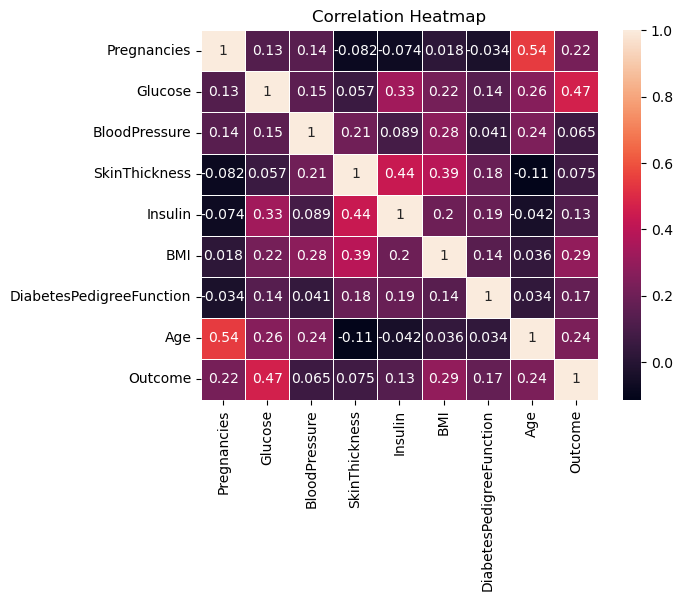

In [35]:
sns.heatmap(data=df.corr(), annot=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
X = df.iloc[:, [1]]  #glucose
y = df.iloc[:, [8]]  #diabetes, 0 or 1
# Converting selected columns to arrays
X_array = X.values
Y_array = y.values
X_array

array([[148],
       [ 85],
       [183],
       [ 89],
       [137],
       [116],
       [ 78],
       [115],
       [197],
       [125],
       [110],
       [168],
       [139],
       [189],
       [166],
       [100],
       [118],
       [107],
       [103],
       [115],
       [126],
       [ 99],
       [196],
       [119],
       [143],
       [125],
       [147],
       [ 97],
       [145],
       [117],
       [109],
       [158],
       [ 88],
       [ 92],
       [122],
       [103],
       [138],
       [102],
       [ 90],
       [111],
       [180],
       [133],
       [106],
       [171],
       [159],
       [180],
       [146],
       [ 71],
       [103],
       [105],
       [103],
       [101],
       [ 88],
       [176],
       [150],
       [ 73],
       [187],
       [100],
       [146],
       [105],
       [ 84],
       [133],
       [ 44],
       [141],
       [114],
       [ 99],
       [109],
       [109],
       [ 95],
       [146],
       [100],
      

In [39]:
df.fillna(method ='ffill', inplace = True)#no difference made since no null values present

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
# Splitting the data into training and testing data
regr = LogisticRegression()
regr.fit(X_train, y_train)

C:\Users\Shriya Bhat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

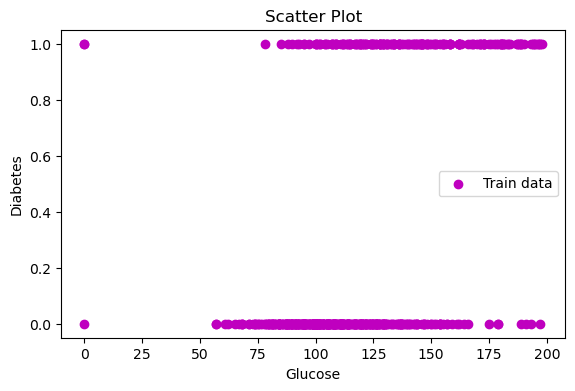

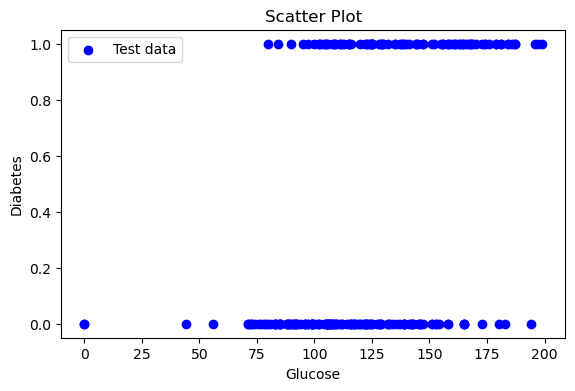

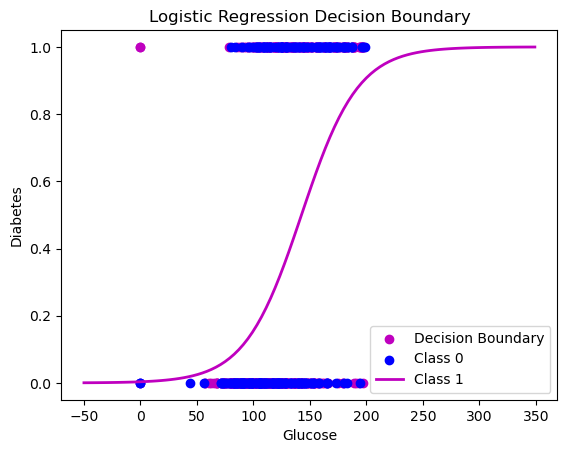

Coeficient:  0.03981924503882402
Intercept:  [-5.67382925]



Evaluation metrics:

Accuracy score for test data:  0.696969696969697
precision :  0.676923076923077
recall :  0.4731182795698925
f1 score :  0.5569620253164557


In [42]:
y_pred = regr.predict(X_test)

plt.figure(figsize=((6.5,4)))
plt.scatter(X_train, y_train, color ='m',label="Train data")
#plt.plot(X_test, y_pred,color="purple")
plt.xlabel('Glucose') 
plt.ylabel('Diabetes')
plt.title("Scatter Plot")
plt.legend()
plt.show()

plt.figure(figsize=((6.5,4)))
plt.scatter(X_test, y_test, color ='blue',label="Test data")
#plt.plot(X_test, y_pred,color="purple")
plt.xlabel('Glucose') 
plt.ylabel('Diabetes')
plt.title("Scatter Plot")
plt.legend()
plt.show()

plt.scatter(X_train, y_train, color ='m',label="Train data")
plt.xlabel('Glucose') 
plt.ylabel('Diabetes')
plt.scatter(X_test, y_test, color ='blue',label="Test data")
#plt.plot(X_test, y_pred,color="purple")
plt.legend()

x_values = np.linspace(X['Glucose'].min()-50, X['Glucose'].max()+150, 100)
y_values = 1 / (1 + np.exp(-(regr.intercept_[0] + regr.coef_[0][0] * x_values)))
plt.plot(x_values, y_values, color='m', linewidth=2)

plt.title('Logistic Regression Decision Boundary')
plt.legend(['Decision Boundary', 'Class 0', 'Class 1'])

plt.show()

print("Coeficient: ",regr.coef_[0][0])
print("Intercept: ",regr.intercept_)
print("\n\n\nEvaluation metrics:\n")
print("Accuracy score for test data: ",accuracy_score(y_test, y_pred))
print( 
  'precision : ', precision_score(y_test, y_pred)) 
print( 
  'recall : ', recall_score(y_test, y_pred)) 
print( 
  'f1 score : ', f1_score(y_test, y_pred))




### Evaluation Metrics

In [43]:
print("Coeficient: ",regr.coef_[0][0])
print("Intercept: ",regr.intercept_)
print("\n\n\nEvaluation metrics:\n")
print("Accuracy score for test data: ",accuracy_score(y_test, y_pred))
print( 
  'precision : ', precision_score(y_test, y_pred)) 
print( 
  'recall : ', recall_score(y_test, y_pred)) 
print( 
  'f1 score : ', f1_score(y_test, y_pred))


Coeficient:  0.03981924503882402
Intercept:  [-5.67382925]



Evaluation metrics:

Accuracy score for test data:  0.696969696969697
precision :  0.676923076923077
recall :  0.4731182795698925
f1 score :  0.5569620253164557


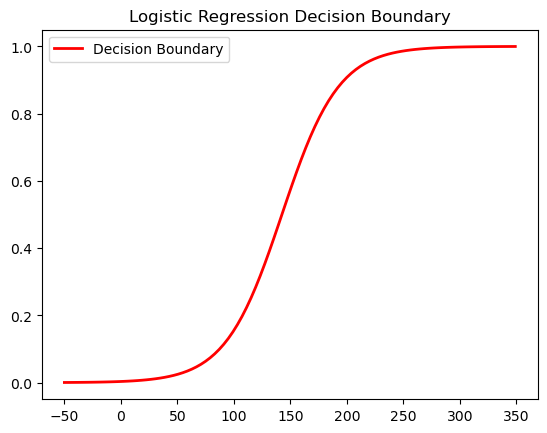

In [44]:
x_values = np.linspace(X['Glucose'].min()-50, X['Glucose'].max()+150, 100)
y_values = 1 / (1 + np.exp(-(regr.intercept_[0] + regr.coef_[0][0] * x_values)))
plt.plot(x_values, y_values, color='red', linewidth=2)

plt.title('Logistic Regression Decision Boundary')
plt.legend(['Decision Boundary', 'Class 0', 'Class 1'])
plt.show()

# Logistic Regression with Multiple Independent Variables:

In [45]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
def replace_outliers_with_median(column):
    # Calculate the median
    median_value = column.median()

    # Calculate the IQR (Interquartile Range)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    column_outliers_replaced = column.where((column >= lower_bound) & (column <= upper_bound), median_value)

    return column_outliers_replaced

In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [48]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df[['Outcome']]

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model = LogisticRegression() 
model.fit(X_train,y_train)
predictions = model.predict(X_test) 

print("Coeficient: ",regr.coef_)
print("Intercept: ",regr.intercept_)
print("\n\nEvaluation metrics:\n")
print("Accuracy score for test data: ",accuracy_score(y_test, y_pred))
print( 
  'precision : ', precision_score(y_test, y_pred)) 
print( 
  'recall : ', recall_score(y_test, y_pred)) 
print( 
  'f1 score : ', f1_score(y_test, y_pred))

Coeficient:  [[0.03981925]]
Intercept:  [-5.67382925]


Evaluation metrics:

Accuracy score for test data:  0.6017316017316018
precision :  0.4153846153846154
recall :  0.3333333333333333
f1 score :  0.36986301369863017


C:\Users\Shriya Bhat\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Shriya Bhat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<b>
Coeficient:  [[0.03686601]] <br>
Intercept:  [-5.30347895] <br>


Evaluation metrics: <br>

Accuracy score for test data:  0.6017316017316018 <br>
precision :  0.39215686274509803 <br>
recall :  0.24691358024691357 <br>
f1 score :  0.30303030303030304 <br>
</b>